# Upper-bound Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance

In [2]:
base_dir = "trained_models/"
# base_dir = "trained_models/backup/"
# base_dir = "trained_models/backup_10epochs/"
# base_dir = "trained_models/backup_20epochs_50sample/"
# base_dir = "trained_models/backup_30epochs_50sample/"
def load_data(train, test, fname) :
    fpath = base_dir + "{}/eval/{}/{}.txt".format(train, test, fname)
    return np.loadtxt(fpath).astype(np.int)

train = "autoattack"
test = "pgd"

y_original = load_data(train, test, "Y_original")
y_original_pred = load_data(train, test, "Y_original_pred")
y_adv = load_data(train, test, "Y_adv")
y_adv_pred = load_data(train, test, "Y_adv_pred")

In [3]:
def get_robust_data(train, test):
    y_adv = load_data(train, test, "Y_adv")
    y_adv_pred = load_data(train, test, "Y_adv_pred")
    return y_adv, y_adv_pred

test = "autoattack"
y_adv, y_adv_pred = get_robust_data(train, test)

print("Y_adv({},{}): {}".format(train, test, y_adv))
print("Y_adv_pred({},{}): {}".format(train, test, y_adv_pred))

Y_adv(autoattack,autoattack): [3 8 8 ... 5 1 7]
Y_adv_pred(autoattack,autoattack): [5 8 0 ... 5 4 7]


In [4]:
attacks = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack", "pixelattack", "spatialtransformation"]

In [5]:
train = attacks.copy()

test = attacks.copy()
test.append("all")

In [6]:
predictions = {}
labels = {}

for a1 in train :
    p = np.array([])
    l = np.array([])
    for a2 in attacks :
        y, y_pred = get_robust_data(a1, a2)
        p = np.concatenate((p, y_pred))
        l = np.concatenate((l, y))
    predictions[a1] = {}
    labels[a1] = {}
    predictions[a1]["all"] = p
    labels[a1]["all"] = l

for a1 in train :
    for a2 in attacks :
        y, y_pred = get_robust_data(a1, a2)
        predictions[a1][a2] = y_pred
        labels[a1][a2] = y

In [7]:
# predictions

In [8]:
# labels

In [28]:
pd.options.display.float_format = '{:,.3f}'.format

In [29]:
accs = {}
for tr in train :
    accs[tr] = {}
    for ts in test :
        accs[tr][ts] = (labels[tr][ts] == predictions[tr][ts]).sum().item() / len(labels[tr][ts])

    
accs = pd.DataFrame(data=accs).T
accs

,autoattack,autopgd,bim,cw,fgsm,pgd,deepfool,newtonfool,squareattack,pixelattack,spatialtransformation,all
autoattack,0.760,0.757,0.752,0.764,0.730,0.751,0.751,0.762,0.760,0.102,0.364,0.659
autopgd,0.760,0.760,0.757,0.770,0.731,0.754,0.756,0.768,0.766,0.102,0.372,0.663
bim,0.751,0.751,0.751,0.760,0.729,0.749,0.751,0.758,0.757,0.137,0.342,0.658
cw,0.757,0.756,0.753,0.779,0.725,0.750,0.762,0.776,0.776,0.132,0.356,0.666
fgsm,0.745,0.747,0.743,0.754,0.732,0.745,0.746,0.754,0.744,0.119,0.368,0.654
pgd,0.758,0.758,0.760,0.769,0.736,0.757,0.760,0.768,0.760,0.088,0.349,0.660
deepfool,0.759,0.759,0.755,0.776,0.737,0.753,0.770,0.773,0.766,0.103,0.364,0.665
newtonfool,0.754,0.754,0.752,0.776,0.720,0.750,0.761,0.775,0.769,0.126,0.353,0.663
squareattack,0.690,0.689,0.687,0.764,0.650,0.680,0.714,0.760,0.805,0.152,0.387,0.634
pixelattack,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.765,0.100,0.160


In [50]:
sorted_acc = accs.sort_values(by="all", ascending=False)
idx = list(sorted_acc.index)
idx.append("all")
sorted_acc = sorted_acc.reindex(idx, axis=1)
sorted_acc

,cw,deepfool,autopgd,newtonfool,pgd,autoattack,bim,fgsm,squareattack,spatialtransformation,pixelattack,all
cw,0.779,0.762,0.756,0.776,0.750,0.757,0.753,0.725,0.776,0.356,0.132,0.666
deepfool,0.776,0.770,0.759,0.773,0.753,0.759,0.755,0.737,0.766,0.364,0.103,0.665
autopgd,0.770,0.756,0.760,0.768,0.754,0.760,0.757,0.731,0.766,0.372,0.102,0.663
newtonfool,0.776,0.761,0.754,0.775,0.750,0.754,0.752,0.720,0.769,0.353,0.126,0.663
pgd,0.769,0.760,0.758,0.768,0.757,0.758,0.760,0.736,0.760,0.349,0.088,0.660
autoattack,0.764,0.751,0.757,0.762,0.751,0.760,0.752,0.730,0.760,0.364,0.102,0.659
bim,0.760,0.751,0.751,0.758,0.749,0.751,0.751,0.729,0.757,0.342,0.137,0.658
fgsm,0.754,0.746,0.747,0.754,0.745,0.745,0.743,0.732,0.744,0.368,0.119,0.654
squareattack,0.764,0.714,0.689,0.760,0.680,0.690,0.687,0.650,0.805,0.387,0.152,0.634
spatialtransformation,0.502,0.470,0.467,0.500,0.457,0.464,0.464,0.467,0.513,0.801,0.096,0.473


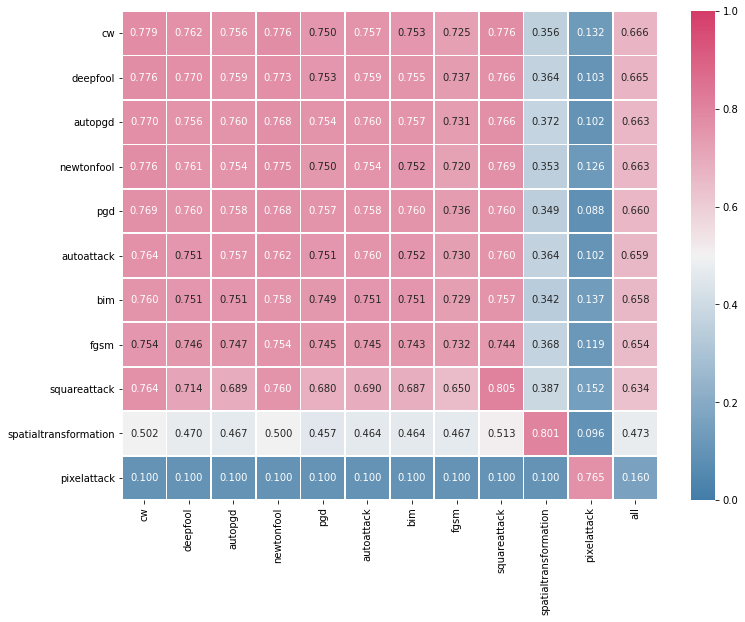

In [51]:
def plot_heatmap(metrics, cmap, fpath, vmin, vmax, annot=True): 

    df = pd.DataFrame(data=metrics)

    plt.figure(figsize=(12,9))
    fig = sns.heatmap(df, cmap=cmap, vmin=vmin, vmax=vmax, annot=annot, fmt=".3f", linewidth=0.7)
#     fig.set(xlabel='Train', ylabel='Test')
    fig.figure.savefig(fpath, bbox_inches='tight')
    plt.show()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(h_neg=240, h_pos=0,s=75, l=50, n=1, as_cmap=True)

path = "plot/at-accuracy.png"

plot_heatmap(sorted_acc, cmap, path, 0, 1)

In [31]:
print(sorted_acc.to_latex(bold_rows=True))

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  autoattack &  autopgd &   bim &    cw &  fgsm &   pgd &  deepfool &  newtonfool &  squareattack &  pixelattack &  spatialtransformation &   all \\
\midrule
\textbf{cw                   } &       0.757 &    0.756 & 0.753 & 0.779 & 0.725 & 0.750 &     0.762 &       0.776 &         0.776 &        0.132 &                  0.356 & 0.666 \\
\textbf{deepfool             } &       0.759 &    0.759 & 0.755 & 0.776 & 0.737 & 0.753 &     0.770 &       0.773 &         0.766 &        0.103 &                  0.364 & 0.665 \\
\textbf{autopgd              } &       0.760 &    0.760 & 0.757 & 0.770 & 0.731 & 0.754 &     0.756 &       0.768 &         0.766 &        0.102 &                  0.372 & 0.663 \\
\textbf{newtonfool           } &       0.754 &    0.754 & 0.752 & 0.776 & 0.720 & 0.750 &     0.761 &       0.775 &         0.769 &        0.126 &                  0.353 & 0.663 \\
\textbf{pgd                  } &       0.758 &    0.758 & 0.760 & 0.769 & 

## Time Execution Measurement

In [11]:
import datetime

def get_adv_train_time_execution(train) :
    fpath = base_dir + "{}/output.log".format(train)

    
    file = open(fpath)
    lines = file.readlines()
    file.close()
    
    start_time = None
    end_time = None
    
    datefmt='%Y/%m/%d %H:%M:%S'
    
    
    for l in lines :
        token = l.split("-")
        date_str = token[0][1:-2]
        date_time = datetime.datetime.strptime(date_str, datefmt)
        if token[1][1:11] == "Namespace(" :
            start_time = date_time
        else :
            end_time = date_time
    
    if end_time > start_time :
        return end_time-start_time
    raise ValueError("Duration not found")
    
# _train = "autoattack"
# _train = "all"
# get_adv_train_time_execution(_train) + get_adv_train_time_execution("fgsm") 

In [12]:
durations = []
for tr in train :
    if tr[:7] == "combine" :
        duration = None
        for i in range(len(attacks)) :
            a = attacks[i]
            if i == 0 :
                duration = get_adv_train_time_execution(a)
            else :
                duration += get_adv_train_time_execution(a)
        duration+= get_adv_train_time_execution(tr)
        durations.append(duration)
    else :
        durations.append(get_adv_train_time_execution(tr))

accs["duration"] = durations

In [13]:
accs["all"]
# accs

autoattack               0.659273
autopgd                  0.663255
bim                      0.657736
cw                       0.665755
fgsm                     0.654273
pgd                      0.660473
deepfool                 0.665082
newtonfool               0.662709
squareattack             0.634409
pixelattack              0.160491
spatialtransformation    0.472800
Name: all, dtype: float64

In [14]:
sorted_acc = accs.sort_values(by="all", ascending=False)
sorted_acc

,autoattack,autopgd,bim,cw,fgsm,pgd,deepfool,newtonfool,squareattack,pixelattack,spatialtransformation,all,duration
cw,0.7571,0.7561,0.7532,0.7791,0.7254,0.7503,0.7624,0.7760,0.7756,0.1319,0.3562,0.665755,0 days 01:13:24
deepfool,0.7593,0.7595,0.7553,0.7759,0.7370,0.7535,0.7702,0.7730,0.7656,0.1027,0.3639,0.665082,0 days 01:12:59
autopgd,0.7599,0.7600,0.7570,0.7698,0.7309,0.7543,0.7563,0.7678,0.7665,0.1015,0.3718,0.663255,0 days 01:13:25
newtonfool,0.7541,0.7540,0.7517,0.7761,0.7200,0.7499,0.7610,0.7753,0.7688,0.1262,0.3527,0.662709,0 days 01:19:50
pgd,0.7585,0.7581,0.7601,0.7691,0.7363,0.7567,0.7605,0.7681,0.7605,0.0882,0.3491,0.660473,0 days 01:20:08
autoattack,0.7599,0.7569,0.7517,0.7636,0.7298,0.7510,0.7511,0.7618,0.7603,0.1023,0.3636,0.659273,0 days 01:12:45
bim,0.7507,0.7508,0.7509,0.7600,0.7287,0.7492,0.7508,0.7582,0.7571,0.1372,0.3415,0.657736,0 days 01:09:43
fgsm,0.7449,0.7473,0.7432,0.7536,0.7324,0.7450,0.7461,0.7543,0.7440,0.1186,0.3676,0.654273,0 days 01:09:24
squareattack,0.6901,0.6888,0.6866,0.7637,0.6500,0.6804,0.7142,0.7601,0.8055,0.1519,0.3872,0.634409,0 days 01:19:47
spatialtransformation,0.4635,0.4674,0.4644,0.5018,0.4669,0.4566,0.4698,0.5001,0.5127,0.0961,0.8015,0.472800,0 days 01:19:45


In [15]:
selected_sorted_acc = sorted_acc[:][["all", "duration"]]
selected_sorted_acc.rename(columns={"all":"test_on_all_adv"})

,test_on_all_adv,duration
cw,0.665755,0 days 01:13:24
deepfool,0.665082,0 days 01:12:59
autopgd,0.663255,0 days 01:13:25
newtonfool,0.662709,0 days 01:19:50
pgd,0.660473,0 days 01:20:08
autoattack,0.659273,0 days 01:12:45
bim,0.657736,0 days 01:09:43
fgsm,0.654273,0 days 01:09:24
squareattack,0.634409,0 days 01:19:47
spatialtransformation,0.472800,0 days 01:19:45


In [32]:
# 3 classes
_clusters = {1: ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool', 'squareattack'], 0: ['pixelattack'], 2: ['spatialtransformation']}

# 4 classes
# _clusters = {3: ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool'], 1: ['squareattack'], 0: ['pixelattack'], 2: ['spatialtransformation']}

In [33]:
clusters = []
for member in _clusters.values() :
    cluster = {}
    cluster["member"] = member
    centroid = member[0]
    acc = sorted_acc["all"][centroid]
    for x in member :
        if sorted_acc["all"][x] > acc :
            centroid = x
            acc = sorted_acc["all"][x]
    cluster["centroid"] = centroid
    clusters.append(cluster)

print(clusters)

[{'member': ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool', 'squareattack'], 'centroid': 'cw'}, {'member': ['pixelattack'], 'centroid': 'pixelattack'}, {'member': ['spatialtransformation'], 'centroid': 'spatialtransformation'}]


In [34]:
upper_bound = 0
n = 0
for c in clusters :
    centroid = c["centroid"]
    for m in c["member"] :
        upper_bound += sorted_acc[m][centroid]
        n += 1
print("Upper bound: ", upper_bound/n)

Upper bound:  0.7638272727272727


In [36]:
def get_execution_time(fpath) :
    
    file = open(fpath)
    lines = file.readlines()
    file.close()
    
    start_time = None
    end_time = None
    
    datefmt='%Y/%m/%d %H:%M:%S'
    
    
    for l in lines :
        token = l.split("-")
        date_str = token[0][1:-2]
        date_time = datetime.datetime.strptime(date_str, datefmt)
        if token[1][1:11] == "Namespace(" :
            start_time = date_time
        else :
            end_time = date_time
    
    if end_time > start_time :
        return end_time-start_time
    raise ValueError("Duration not found")

In [47]:
duration = None
for i in range(len(attacks)) :
    a = attacks[i]
    fpath = "trained_models/" + a + "/output.log"
    if i == 0 :
        duration = get_execution_time(fpath)
    else :
        duration += get_execution_time(fpath)

fpath = "noise_predictors/resnet18_3_pixelattack_spatialtransformation_cw_piecewise_eps8_bs128_maxlr0.1_wd0.0001_ls0.3_BNeval/output.log"
duration += get_execution_time(fpath)

fpath = "ensemble_models/cifar_model/eval/all/output.log"
duration += get_execution_time(fpath)

days_and_time = duration
days = days_and_time.days
seconds = days_and_time.seconds

hours = seconds//3600
minutes = (seconds//60)%60
print("days:", days, "\nhours:", hours, "\nminutes:", minutes)

days: 0 
hours: 14 
minutes: 44
